# Problem Statement:

### We have a client who has a website where people write different reviews for technical products.Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

#### Importing all the essential Python Libraries for doing this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
import string
import nltk
import joblib
from nltk.corpus import  stopwords
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Let us import the dataset and Save it in ds

In [2]:
ds = pd.read_csv("S:\Data Science Projects\Flip Robo\Ratings Project\Dataset.csv")

### As we have imported the dataset lets now see the first 5 rows of the data

In [3]:
ds.head()

,Unnamed: 0,Short,Long,Rating
0,12709,Moderate,Good,2
1,18185,Bad quality,Good but some technical issue after sometime,2
2,3727,Fabulous.,Very good product for light usage. Work very f...,5
3,15271,Decent product,Ok ok type not.\nCause some ear pain\nNot good...,3
4,5785,Money waste,Worst,1


### from above we can see that there are 4 columns from which we only need Long Reviews and Ratings let us drop the other columns using ds.drop() method

In [4]:
ds.drop(['Unnamed: 0','Short'],1,inplace=True)

In [5]:
ds.head()

,Long,Rating
0,Good,2
1,Good but some technical issue after sometime,2
2,Very good product for light usage. Work very f...,5
3,Ok ok type not.\nCause some ear pain\nNot good...,3
4,Worst,1


### From above we can see that we have successfully dropped the non important columns

### From above we can see that Long column is our Independent Column and Rating is our dependent Column

### lets see the Rating Counts using Seaborn

5    4714
1    4604
4    4561
3    4417
2    4036
Name: Rating, dtype: int64


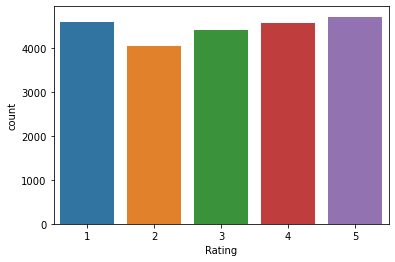

In [6]:
sns.countplot(ds['Rating'])
print(ds['Rating'].value_counts())

### from above we can see the count of all the Ratings in the Rating column and the dataset is Balanced

Lets check the shape of the dataset

In [7]:
ds.shape

(22332, 2)

In [8]:
length1 = ds.Long.str.len()

#### from above we can see that there are 22332 rows and 2 columns in the dataset

### let us remove the Extra Spaces, Numbers, Emails and other things from the dataset using Regular Expressions

## Regular Expression

Some common regular expression metacharacters - copied from wikipedia
^ Matches the starting position within the string. In line-based tools, it matches the starting position of any line.

. Matches any single character (many applications exclude newlines, and exactly which characters are considered newlines is flavor-, character-encoding-, and platform-specific, but it is safe to assume that the line feed character is included). Within POSIX bracket expressions, the dot character matches a literal dot. For example, a.c matches "abc", etc., but [a.c] matches only "a", ".", or "c".

[ ] A bracket expression. Matches a single character that is contained within the brackets. For example, [abc] matches "a", "b", or "c". [a-z] specifies a range which matches any lowercase letter from "a" to "z". These forms can be mixed: [abcx-z] matches "a", "b", "c", "x", "y", or "z", as does [a-cx-z]. The - character is treated as a literal character if it is the last or the first (after the ^, if present) character within the brackets: [abc-], [-abc]. Note that backslash escapes are not allowed. The ] character can be included in a bracket expression if it is the first (after the ^) character: []abc].

[^ ] Matches a single character that is not contained within the brackets. For example, [^abc] matches any character other than "a", "b", or "c". [^a-z] matches any single character that is not a lowercase letter from "a" to "z". Likewise, literal characters and ranges can be mixed.

$ Matches the ending position of the string or the position just before a string-ending newline. In line-based tools, it matches the ending position of any line.

( ) Defines a marked subexpression. The string matched within the parentheses can be recalled later (see the next entry, \n). A marked subexpression is also called a block or capturing group. BRE mode requires ( ).

\n Matches what the nth marked subexpression matched, where n is a digit from 1 to 9. This construct is vaguely defined in the POSIX.2 standard. Some tools allow referencing more than nine capturing groups.

Matches the preceding element zero or more times. For example, abc matches "ac", "abc", "abbbc", etc. [xyz] matches "", "x", "y", "z", "zx", "zyx", "xyzzy", and so on. (ab)* matches "", "ab", "abab", "ababab", and so on.
{m,n} Matches the preceding element at least m and not more than n times. For example, a{3,5} matches only "aaa", "aaaa", and "aaaaa". This is not found in a few older instances of regexes. BRE mode requires {m,n}.

In [9]:
# Replace email addresses with 'email'
ds['Long'] = ds['Long'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 ' ')

# Replace URLs with 'webaddress'
ds['Long'] = ds['Long'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  ' ')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
ds['Long'] = ds['Long'].str.replace(r'£|\$', ' ')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
ds['Long'] = ds['Long'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  ' ')

# Replace numbers with 'numbr'
ds['Long'] = ds['Long'].str.replace(r'\d+(\.\d+)?', ' ')

# Remove punctuation
ds['Long'] = ds['Long'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
ds['Long'] = ds['Long'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
ds['Long'] = ds['Long'].str.replace(r'^\s+|\s+?$', ' ')

In [10]:
ds.head()

,Long,Rating
0,Good,2
1,Good but some technical issue after sometime,2
2,Very good product for light usage Work very fi...,5
3,Ok ok type not Cause some ear pain Not good bu...,3
4,Worst,1


lets us now lower Case the sentence so that if Big and big present in the Dataset it will take same meaning

In [11]:
ds['Long'] = ds['Long'].str.lower()

In [12]:
ds

,Long,Rating
0,good,2
1,good but some technical issue after sometime,2
2,very good product for light usage work very fi...,5
3,ok ok type not cause some ear pain not good bu...,3
4,worst,1
...,...,...
22327,work less than a year,3
22328,this is no value for money product below average,2
22329,everything is good only the design and built q...,4
22330,produt is not good after grace periode it s no...,2


from above we can see that we have converted the Review Column as lower case

#### now let us remove the Stopwords from the dataset

In [13]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

ds['Long'] = ds['Long'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [14]:
ds

,Long,Rating
0,good,2
1,good technical issue sometime,2
2,good product light usage work fine print quali...,5
3,ok ok type cause ear pain good ok type,3
4,worst,1
...,...,...
22327,work less year,3
22328,value money product average,2
22329,everything good design built quality felt mark...,4
22330,produt good grace periode working pls check buy,2


from above we can see that we have removed the Stopwords from the dataset

In [15]:
clean = ds.Long.str.len()

In [16]:
print("Original Length of String:", length1.sum())
print("After Removing Stopwords:", clean.sum())

Original Length of String: 3176892
After Removing Stopwords: 2076002


from above we can see we have removed 11 Lakhs Stopwords from the dataset and Rreduced the dimension 

# WordCloud for 1 Star Rating

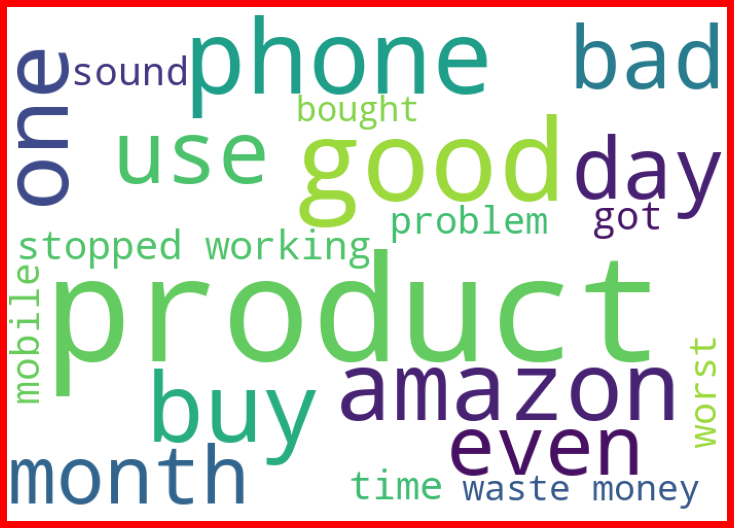

In [17]:
one = ds['Long'][ds['Rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# WordCloud for 2 Star

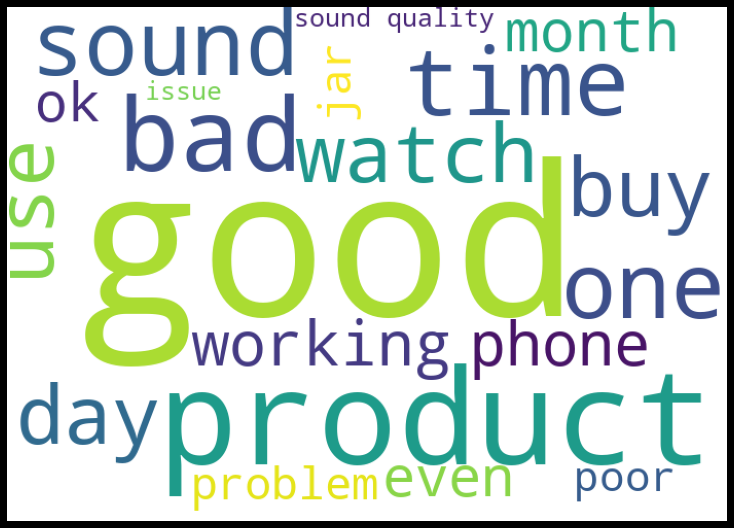

In [18]:
two = ds['Long'][ds['Rating']==2]

two_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(two))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(two_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# WordCloud for 3 Star

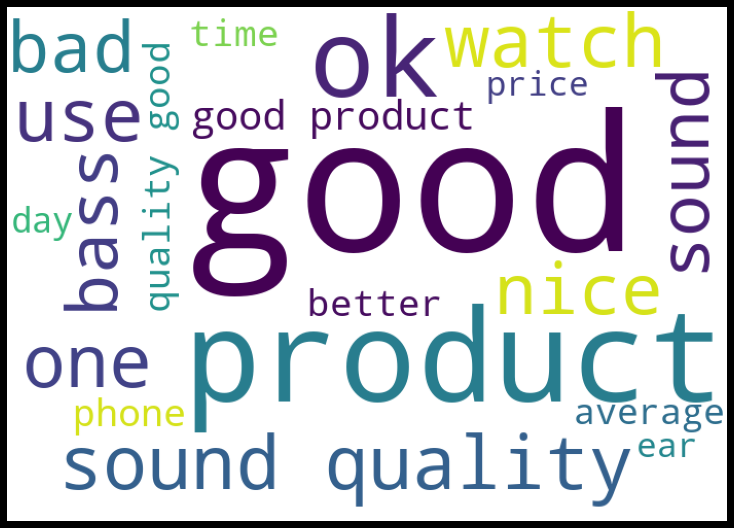

In [19]:
three = ds['Long'][ds['Rating']==3]

three_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(three))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(three_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# WordCloud for 4 Star

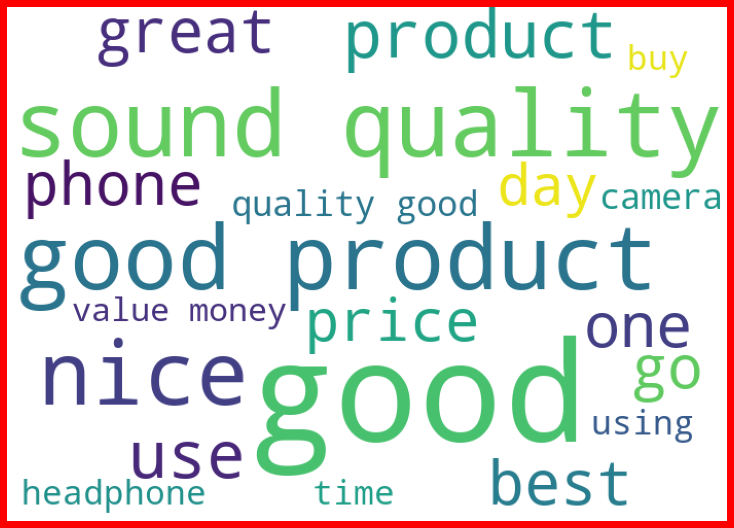

In [20]:
four = ds['Long'][ds['Rating']==4]

four_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(four))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(four_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

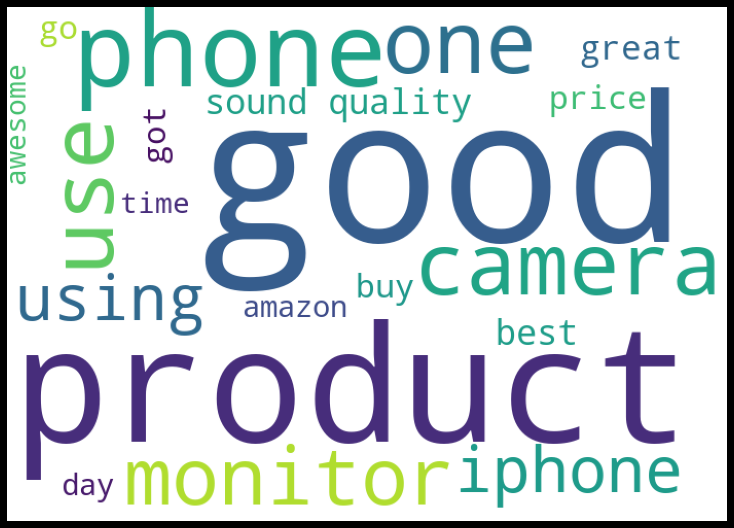

In [21]:
five = ds['Long'][ds['Rating']==5]

five_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(five))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(five_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Lets now use Term Frequency and Inverse Document Frequency for Vectorizing the Words as our model cannot understand String Type data

In [22]:
tfidf = TfidfVectorizer()

In [23]:
dependent = tfidf.fit_transform(ds['Long'])

In [24]:
X = dependent
Y = ds['Rating']

### Lets see the Accuracy of the model for all the columns

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=42)

In [26]:
mnb = MultinomialNB()
mnb.fit(X_train ,Y_train)
pred = mnb.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, pred))

Accuracy Score: 0.49145299145299143


from above we can see that the accuracy is 49% lets find the best accuracy score

In [27]:
model = [DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreeClassifier(), AdaBoostClassifier(), SVC(), KNeighborsClassifier(), MultinomialNB(), XGBClassifier(verbosity = 0), XGBRFClassifier(verbosity=0)]

lets now find the best model and max_columns for TFIDF

In [28]:
maxacc = 0
maxtf = 0
name = 0
for i in range(1000,14000,1000):
    tfidf = TfidfVectorizer(max_features=i, ngram_range=(1,3))
    dep = tfidf.fit_transform(ds['Long'])
    X = dep
    Y = ds['Rating']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=42)
    for j in model:
        j.fit(X_train, Y_train)
        pred = j.predict(X_test)
        acc = accuracy_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxtf = i
            name = j
    
print("Maximum Accuracy is {} for model {} at max_features {}".format(maxacc, name, maxtf))

Maximum Accuracy is 0.5170940170940171 for model SVC() at max_features 11000


from above we can see that we got accuracy of 52% for SVM at max_features = 11000

In [29]:
svm = SVC()

In [30]:
tfidf = TfidfVectorizer(max_features=11000, ngram_range=(1,3))

In [31]:
dep = tfidf.fit_transform(ds['Long'])
X = dep
Y = ds['Rating']

In [32]:
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=42)

In [33]:
svm.fit(X_train, Y_train)
pred = svm.predict(X_test)
accuracy_score(Y_test, pred)

0.5170940170940171

lets now find the best Random State

In [34]:
maxacc = 0
maxrs = 0
tfidf = TfidfVectorizer(max_features=11000, ngram_range=(1,3))
dep = tfidf.fit_transform(ds['Long'])
X = dep
Y = ds['Rating']
for i in range(0,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=i)
    mnb = MultinomialNB()
    mnb.fit(X_train, Y_train)
    pred = mnb.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print("Maximum Accuracy is {} at Random STate {}".format(maxacc, maxrs))

Maximum Accuracy is 0.5262515262515263 at Random STate 367


lets use the Random State as 367 for all the model and see the accuracy 

In [35]:
tfidf = TfidfVectorizer(max_features=11000, ngram_range=(1,3))
dep = tfidf.fit_transform(ds['Long'])
X = dep
Y = ds['Rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=367)

In [36]:
print("Decision Tree Classifier")
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predtc = dtc.predict(X_test)
acc = accuracy_score(Y_test, pred)*100
print(acc)
print("Confusion Matrix: ",confusion_matrix(Y_test, predtc))
print("Classification Report: ", classification_report(Y_test, predtc))

Decision Tree Classifier
20.91982091982092
Confusion Matrix:  [[495 223 121  92 121]
 [189 369 185  77  66]
 [ 83 146 403 203 108]
 [ 56  72 220 390 201]
 [128  89 150 259 468]]
Classification Report:                precision    recall  f1-score   support

           1       0.52      0.47      0.49      1052
           2       0.41      0.42      0.41       886
           3       0.37      0.43      0.40       943
           4       0.38      0.42      0.40       939
           5       0.49      0.43      0.45      1094

    accuracy                           0.43      4914
   macro avg       0.43      0.43      0.43      4914
weighted avg       0.44      0.43      0.43      4914



In [37]:
print("Extra Tree Classifier")
etc = ExtraTreeClassifier()
etc.fit(X_train, Y_train)
predetc = etc.predict(X_test)
accetc = accuracy_score(Y_test, predetc)*100
print(accetc)
print("Confusion Matrix:", confusion_matrix(Y_test, predetc))
print("Classification Report:", classification_report(Y_test, predetc))

Extra Tree Classifier
40.23199023199023
Confusion Matrix: [[471 218 134 102 127]
 [198 344 198  88  58]
 [ 94 170 387 202  90]
 [ 83 102 241 331 182]
 [126  93 164 267 444]]
Classification Report:               precision    recall  f1-score   support

           1       0.48      0.45      0.47      1052
           2       0.37      0.39      0.38       886
           3       0.34      0.41      0.37       943
           4       0.33      0.35      0.34       939
           5       0.49      0.41      0.45      1094

    accuracy                           0.40      4914
   macro avg       0.41      0.40      0.40      4914
weighted avg       0.41      0.40      0.40      4914



In [38]:
print("Random Forest Classifier")
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print(accrfc)
print("Confusion Matrix:", confusion_matrix(Y_test, predrfc))
print("Classification Report:", classification_report(Y_test, predrfc))

Random Forest Classifier
51.48555148555148
Confusion Matrix: [[673 150  71  48 110]
 [204 393 167  64  58]
 [ 76 153 393 221 100]
 [ 64  36 183 401 255]
 [ 91  46  89 198 670]]
Classification Report:               precision    recall  f1-score   support

           1       0.61      0.64      0.62      1052
           2       0.51      0.44      0.47       886
           3       0.44      0.42      0.43       943
           4       0.43      0.43      0.43       939
           5       0.56      0.61      0.59      1094

    accuracy                           0.51      4914
   macro avg       0.51      0.51      0.51      4914
weighted avg       0.51      0.51      0.51      4914



In [39]:
print("AdaBoost Classifier")
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = accuracy_score(Y_test, predadb)*100
print(accadb)
print("Confusion Matrix: ", confusion_matrix(Y_test, predadb))
print("Classification Report: ", classification_report(Y_test, predadb))

AdaBoost Classifier
45.58404558404558
Confusion Matrix:  [[557 258  76  57 104]
 [199 447 143  54  43]
 [ 74 228 373 193  75]
 [ 48 131 213 324 223]
 [ 97 136 120 202 539]]
Classification Report:                precision    recall  f1-score   support

           1       0.57      0.53      0.55      1052
           2       0.37      0.50      0.43       886
           3       0.40      0.40      0.40       943
           4       0.39      0.35      0.37       939
           5       0.55      0.49      0.52      1094

    accuracy                           0.46      4914
   macro avg       0.46      0.45      0.45      4914
weighted avg       0.46      0.46      0.46      4914



In [40]:
print("SVC")
svc = SVC()
svc.fit(X_train,Y_train)
predsvc = svc.predict(X_test)
accsvc = accuracy_score(Y_test, predsvc)*100
print(accsvc)
print("Confusion Matrix:", confusion_matrix(Y_test, predsvc))
print("Classification Report: ", classification_report(Y_test, predsvc))

SVC
53.39845339845339
Confusion Matrix: [[675 158  84  35 100]
 [215 406 175  54  36]
 [ 81 138 448 205  71]
 [ 63  47 189 409 231]
 [ 93  41  82 192 686]]
Classification Report:                precision    recall  f1-score   support

           1       0.60      0.64      0.62      1052
           2       0.51      0.46      0.48       886
           3       0.46      0.48      0.47       943
           4       0.46      0.44      0.45       939
           5       0.61      0.63      0.62      1094

    accuracy                           0.53      4914
   macro avg       0.53      0.53      0.53      4914
weighted avg       0.53      0.53      0.53      4914



In [41]:
print("Kneighbors Classifier")
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print(accknn)
print("Confusion Matrix:", confusion_matrix(Y_test, predknn))
print("Classification Report:", classification_report(Y_test, predknn))

Kneighbors Classifier
31.115181115181116
Confusion Matrix: [[357 254 234  96 111]
 [226 323 185  78  74]
 [155 189 384 132  83]
 [156 151 267 252 113]
 [194 210 280 197 213]]
Classification Report:               precision    recall  f1-score   support

           1       0.33      0.34      0.33      1052
           2       0.29      0.36      0.32       886
           3       0.28      0.41      0.33       943
           4       0.33      0.27      0.30       939
           5       0.36      0.19      0.25      1094

    accuracy                           0.31      4914
   macro avg       0.32      0.31      0.31      4914
weighted avg       0.32      0.31      0.31      4914



In [42]:
print("Naive Bayes")
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
predmnb = mnb.predict(X_test)
accmnb = accuracy_score(Y_test, predmnb)*100
print(accmnb)
print("Confusion Matrix: ", confusion_matrix(Y_test, predmnb))
print("Classification Report: ", classification_report(Y_test, predmnb))

Naive Bayes
52.62515262515263
Confusion Matrix:  [[716 106  75  50 105]
 [280 278 194  74  60]
 [ 88  84 447 233  91]
 [ 62  29 178 452 218]
 [ 90  23  69 219 693]]
Classification Report:                precision    recall  f1-score   support

           1       0.58      0.68      0.63      1052
           2       0.53      0.31      0.40       886
           3       0.46      0.47      0.47       943
           4       0.44      0.48      0.46       939
           5       0.59      0.63      0.61      1094

    accuracy                           0.53      4914
   macro avg       0.52      0.52      0.51      4914
weighted avg       0.53      0.53      0.52      4914



In [43]:
print("XGBClassifier")
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
accxgb = accuracy_score(Y_test, predxgb)*100
print(accxgb)
print("Confusion Matrix: ", confusion_matrix(Y_test, predxgb))
print("Classification Report: ", classification_report(Y_test, predxgb))

XGBClassifier
50.32560032560033
Confusion Matrix:  [[608 209  88  62  85]
 [176 453 153  59  45]
 [ 64 188 387 238  66]
 [ 53  78 173 440 195]
 [108  72  72 257 585]]
Classification Report:                precision    recall  f1-score   support

           1       0.60      0.58      0.59      1052
           2       0.45      0.51      0.48       886
           3       0.44      0.41      0.43       943
           4       0.42      0.47      0.44       939
           5       0.60      0.53      0.57      1094

    accuracy                           0.50      4914
   macro avg       0.50      0.50      0.50      4914
weighted avg       0.51      0.50      0.50      4914



In [44]:
print("XGBRFClassifier")
xgbrfc = XGBRFClassifier(verbosity = 0)
xgbrfc.fit(X_train, Y_train)
predxgbrfc = xgbrfc.predict(X_test)
accxgbrfc = accuracy_score(Y_test, predxgbrfc)*100
print(accxgbrfc)
print("Confusion Matrix: ", confusion_matrix(Y_test, predxgbrfc))
print("Classification Report: ", classification_report(Y_test, predxgbrfc))

XGBRFClassifier
41.29019129019129
Confusion Matrix:  [[465 370  59  88  70]
 [208 450 111  89  28]
 [ 67 267 305 253  51]
 [ 29 200 156 384 170]
 [ 70 236  81 282 425]]
Classification Report:                precision    recall  f1-score   support

           1       0.55      0.44      0.49      1052
           2       0.30      0.51      0.37       886
           3       0.43      0.32      0.37       943
           4       0.35      0.41      0.38       939
           5       0.57      0.39      0.46      1094

    accuracy                           0.41      4914
   macro avg       0.44      0.41      0.41      4914
weighted avg       0.45      0.41      0.42      4914



# From above all the models we can see that SVM has performed really well so lets now do Hyper Parameter Tuning for SVM

In [45]:
parameter = {
    'kernel':['linear','poly','rbf'],
    'gamma':['scale','auto'],
    'degree':[1,2,3,4]
}

In [46]:
gscv = GridSearchCV(svc, parameter)

In [47]:
gscv.fit(X_train ,Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [48]:
gscvpred = gscv.best_estimator_.predict(X_test)

In [49]:
acc = accuracy_score(Y_test, gscvpred)*100
print(acc)
print("Confusion Matrix: ", confusion_matrix(Y_test, gscvpred))
print("Classification Report: ", classification_report(Y_test, gscvpred))

53.39845339845339
Confusion Matrix:  [[675 158  84  35 100]
 [215 406 175  54  36]
 [ 81 138 448 205  71]
 [ 63  47 189 409 231]
 [ 93  41  82 192 686]]
Classification Report:                precision    recall  f1-score   support

           1       0.60      0.64      0.62      1052
           2       0.51      0.46      0.48       886
           3       0.46      0.48      0.47       943
           4       0.46      0.44      0.45       939
           5       0.61      0.63      0.62      1094

    accuracy                           0.53      4914
   macro avg       0.53      0.53      0.53      4914
weighted avg       0.53      0.53      0.53      4914



### from above we can see that we have got 53.40% accuracy lets save the model using joblib

In [50]:
joblib.dump(gscv.best_estimator_, 'Rating.pkl')

['Rating.pkl']